# OBJECT DETECTION

# Template matching

use these methods
```methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']``` 
in eval function

for ```cv2.TM_SQDIFF```, ```cv2.TM_SQDIFF_NORMED``` in these methods the **min_loc** is the matching template's top point.. 
others it top point is **max_loc**.

to find min and max loc use minMaxLoc()

The syntax for matching template is
```cv2.matchTemplate(full_Pic,part_of_pic,method)```


#  Corner detection

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

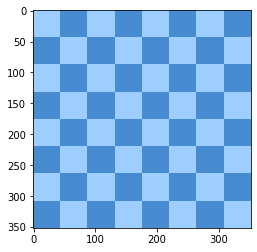

In [16]:
chess=cv2.imread('DATA/flat_chessboard.png')
plt.imshow(chess)


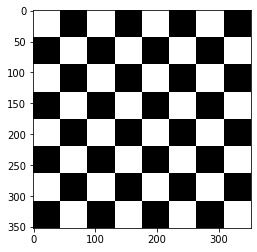

In [18]:
gray=cv2.cvtColor(chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,'gray')

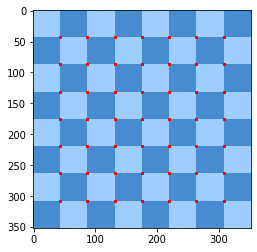

In [19]:
chess_float=np.float32(gray)

dst=cv2.cornerHarris(chess_float,blockSize=2, ksize=3, k=0.04)

dst=cv2.dilate(dst,None)

chess[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(chess)

### EXAMPLE 2

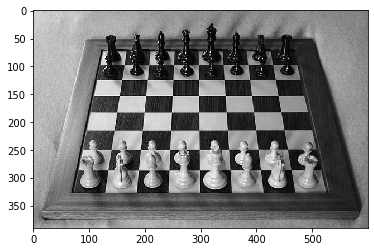

In [24]:
rchess=cv2.imread('DATA/real_chessboard.jpg')
rchess=cv2.cvtColor(rchess,cv2.COLOR_BGR2RGB)
gray=cv2.cvtColor(rchess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,'gray')

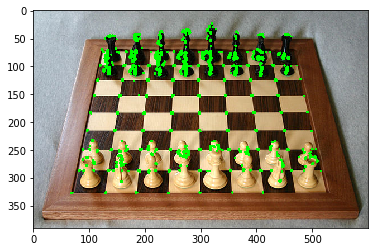

In [35]:
rc_f=np.float32(gray)
dst=cv2.cornerHarris(rc_f,1,5,0.01)
dst=cv2.dilate(dst,None)
rchess[dst>0.01*dst.max()]=[0,255,0]
plt.imshow(rchess)

### Shi_THOMSAI CORNER DETECTOR

In [36]:
ch=cv2.imread('DATA/flat_chessboard.png')
ch=cv2.cvtColor(ch,cv2.COLOR_BGR2RGB)
gray_ch= cv2.cvtColor(ch,cv2.COLOR_RGB2GRAY)

corner=cv2.goodFeaturesToTrack(gray_ch,10,0.1,10)


In [37]:
corner

array([[[308., 308.]],

       [[264., 308.]],

       [[220., 308.]],

       [[176., 308.]],

       [[132., 308.]],

       [[ 88., 308.]],

       [[ 44., 308.]],

       [[308., 264.]],

       [[264., 264.]],

       [[220., 264.]]], dtype=float32)

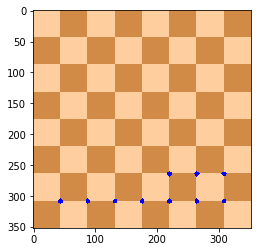

In [44]:
corner=np.int0(corner)
for i in corner:
    x,y=i.ravel()
    cv2.circle(ch,(x,y),3,(0,0,255),1)
plt.imshow(ch)    

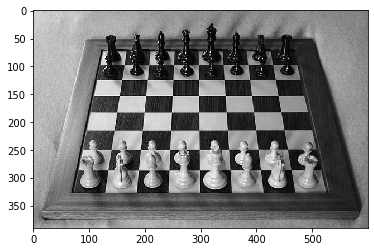

In [45]:
rchess=cv2.imread('DATA/real_chessboard.jpg')
rchess=cv2.cvtColor(rchess,cv2.COLOR_BGR2RGB)
gray=cv2.cvtColor(rchess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,'gray')


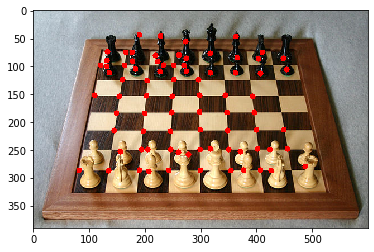

In [50]:
corner=cv2.goodFeaturesToTrack(gray,80,.1,10)
cor = np.int0(corner)

for i in corner:
    x,y=i.ravel()
    cv2.circle(rchess,(x,y),5,(255,0,0),-1)
plt.imshow(rchess)    

# EDGE DETECTION

### Brute_force method with orb description

In [1]:
def display(img):
    fig=plt.figure(figsize=(10,8))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

box=cv2.imread('DATA/reeses_puffs.png')
rack=cv2.imread('DATA/many_cereals.jpg')


In [8]:
orb=cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(box,None)
kp2, des2 = orb.detectAndCompute(rack,None)

bf= cv2.BFMatcher(cv2.NORM_HAMMING,True)
matches= bf.match(des1,des2)

matches=sorted(matches,key=lambda x:x.distance)

rack_match=cv2.drawMatches(box,kp1,rack,kp2,matches[:25],None,2)

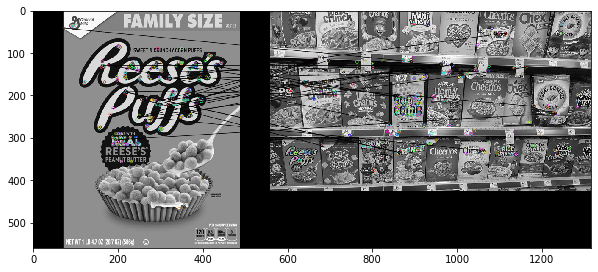

In [9]:
display(rack_match)

In [10]:
orb=cv2.ORB_create()
kp1,des1=orb.detectAndCompute(box,None)
kp2,des2=orb.detectAndCompute(rack,None)

bf=cv2.BFMatcher(cv2.NORM_HAMMING,True)



### BF matcher with SIFT descriptor

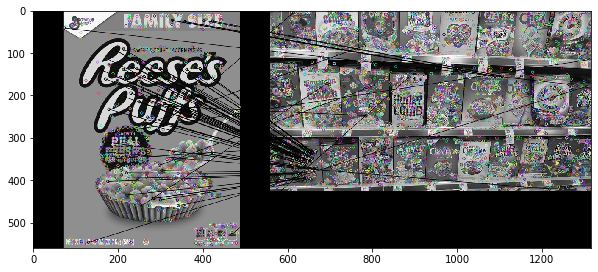

In [16]:
#Ratio test



sift=cv2.SIFT_create()

kp1,des1=sift.detectAndCompute(box,None)
kp2,des2=sift.detectAndCompute(rack,None)

bf=cv2.BFMatcher()
matches= bf.knnMatch(des1,des2,k=2)

good=[]

for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

sift_matches=cv2.drawMatchesKnn(box,kp1,rack,kp2,good,None,2)


display(sift_matches)

In [17]:
# Flann based test